In [3]:
#한글 폰트 설정

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf' #Fonts dir에 인식되지 않는 경우가 문제 발생 원인, 다시 시작해서 인식시켜 보자.
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# 다시 돌려보고 싶다면, 이것만 뽑아서 바로 가공하자!

twwd_fd = pd.read_csv('./data/2017_21_12_2_twwd_fd_drna.csv')
twwd_fd = twwd_fd.set_index('일시')

출처
1. 에어코리아 : https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123

2. 기상자료개방포털 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

**주의: 에어코리아는 당일 포함 기간 설정 2/28, 기상자료개방포털은 당일 포함하지 않고 3/1까지로 출력!**

> **미세먼지 데이터 (서울 거점 평균 시간별 농도 )**
===
>> 2017-2021/12-02 : 5개년 겨울철 데이터

In [53]:
df_12 = pd.read_excel('./data/2017/fd/2016_12_fd.xls')
df_1 = pd.read_excel('./data/2017/fd/2017_01_fd.xls')
df_2 = pd.read_excel('./data/2017/fd/2017_02_fd.xls')

In [54]:
df_12.drop(['시도','측정소명', '측정소코드', '아황산가스', '일산화탄소', '오존', '이산화질소'], axis= 1, inplace = True)

In [55]:
df_1.drop(['시도','측정소명', '측정소코드', '아황산가스', '일산화탄소', '오존', '이산화질소'], axis= 1, inplace = True)

In [56]:
df_2.drop(['시도','측정소명', '측정소코드', '아황산가스', '일산화탄소', '오존', '이산화질소'], axis= 1, inplace = True)

In [57]:
#거점별 미세먼지 농도 평균내기

df_12 = df_12.groupby('날짜').mean() 
df_1 = df_1.groupby('날짜').mean()
df_2 = df_2.groupby('날짜').mean()

In [58]:
df_12.shape, df_1.shape, df_2.shape

((744, 2), (744, 2), (672, 2))

In [59]:
df_fd = pd.concat([df_12, df_1, df_2], axis = 0) #744+744+672 = 2160 확인!
df_fd.head()

,PM10,PM2.5
날짜,,
2016-12-01 01,35.583333,22.608696
2016-12-01 02,50.416667,30.291667
2016-12-01 03,68.083333,39.791667
2016-12-01 04,90.291667,52.666667
2016-12-01 05,108.916667,58.625000


In [60]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 2016-12-01 01 to 2017-02-28 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    2160 non-null   float64
 1   PM2.5   2160 non-null   float64
dtypes: float64(2)
memory usage: 50.6+ KB


In [61]:
df_fd.describe()

,PM10,PM2.5
count,2160.000000,2160.000000
mean,49.028114,30.172049
std,24.440160,17.365981
min,5.681818,3.086957
25%,32.480000,17.280000
50%,43.673333,26.875000
75%,58.883523,38.030000
max,218.560000,115.520000


> > ## 5개년 PM2.5 농도 데이터 합치기

In [62]:
df_21_fd = pd.read_csv('./data/2021/2021_12_2_fd.csv')
df_20_fd = pd.read_csv('./data/2020/2020_12_2_fd.csv')
df_19_fd = pd.read_csv('./data/2019/2019_12_2_fd.csv')
df_18_fd = pd.read_csv('./data/2018/2018_12_2_fd.csv')
df_17_fd = pd.read_csv('./data/2017/2017_12_2_fd.csv')

In [63]:
df_21_fd = df_21_fd.rename(columns={'PM2.5':'21_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_20_fd = df_20_fd.rename(columns={'PM2.5':'20_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_19_fd = df_19_fd.rename(columns={'PM2.5':'19_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_18_fd = df_18_fd.rename(columns={'PM2.5':'18_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_17_fd = df_17_fd.rename(columns={'PM2.5':'17_PM2.5'}).drop(['날짜', 'PM10'], axis =1)

In [65]:
df_17_21_fd = pd.concat([df_21_fd, df_20_fd, df_19_fd, df_18_fd, df_17_fd], axis=1)
# df_17_21.to_csv('./data/2017_21_12_2_fd.csv', encoding='utf-8-sig')

In [66]:
# df_17_21_fd = df_17_21
df_17_21_fd

,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
0,22.720,22.083333,18.28,11.00,22.608696
1,21.520,20.250000,17.72,10.68,30.291667
2,20.280,19.875000,18.88,10.76,39.791667
3,19.120,19.541667,19.64,10.16,52.666667
4,19.375,20.333333,19.16,9.60,58.625000
...,...,...,...,...,...
2179,NaN,16.960000,NaN,NaN,NaN
2180,NaN,19.120000,NaN,NaN,NaN
2181,NaN,19.600000,NaN,NaN,NaN
2182,NaN,20.640000,NaN,NaN,NaN


> **풍속, 풍향과 기온 데이터 (서울 시간별 데이터)**
===
> > ## 서, 북 풍향 범주화 
> > - 서풍: 225-315 -> 0/ 북풍: 315-45 -> 1/ 남동풍: 45-225 -> 2 (이상, 미만)

In [111]:
df_21_wd = pd.read_csv('./data/2021/2021_12_2_wdir.csv', encoding='CP949')
df_20_wd = pd.read_csv('./data/2020/2020_12_2_wdir.csv', encoding='CP949')
df_19_wd = pd.read_csv('./data/2019/2019_12_2_wdir.csv', encoding='CP949')
df_18_wd = pd.read_csv('./data/2018/2018_12_2_wdir.csv', encoding='CP949')
df_17_wd = pd.read_csv('./data/2017/2017_12_2_wdir.csv', encoding='CP949')

In [113]:
# 서, 북 풍향 범주화

df_21_wd = df_21_wd.rename(columns={'풍향(16방위)':'21_WD'}).drop(['지점명', '지점', '일시'], axis =1)
df_21_wd['sort_21WD'] = pd.cut(df_21_wd['21_WD'], bins=[-1,45,225,315,360], labels=[1,2,0,11])
df_21_wd['sort_21WD'] = df_21_wd['sort_21WD'].replace(11, 1)

In [114]:
df_20_wd = df_20_wd.rename(columns={'풍향(16방위)':'20_WD'}).drop(['지점명', '지점'], axis =1)
df_20_wd['sort_20WD'] = pd.cut(df_20_wd['20_WD'], bins=[-1,45,225,315,360], labels=[1,2,0,11])
df_20_wd['sort_20WD'] = df_20_wd['sort_20WD'].replace(11, 1)

In [115]:
df_19_wd = df_19_wd.rename(columns={'풍향(16방위)':'19_WD'}).drop(['지점명', '지점', '일시'], axis =1)
df_19_wd['sort_19WD'] = pd.cut(df_19_wd['19_WD'], bins=[-1,45,225,315,360], labels=[1,2,0,11])
df_19_wd['sort_19WD'] = df_19_wd['sort_19WD'].replace(11, 1)

In [116]:
df_18_wd = df_18_wd.rename(columns={'풍향(16방위)':'18_WD'}).drop(['지점명', '지점', '일시'], axis =1)
df_18_wd['sort_18WD'] = pd.cut(df_18_wd['18_WD'], bins=[-1,45,225,315,360], labels=[1,2,0,11])
df_18_wd['sort_18WD'] = df_18_wd['sort_18WD'].replace(11, 1)

In [117]:
df_17_wd = df_17_wd.rename(columns={'풍향(16방위)':'17_WD'}).drop(['지점명', '지점', '일시'], axis =1)
df_17_wd['sort_17WD'] = pd.cut(df_17_wd['17_WD'], bins=[-1,45,225,315,360], labels=[1,2,0,11])
df_17_wd['sort_17WD'] = df_17_wd['sort_17WD'].replace(11, 1)

In [118]:
# 결측값 확인
df_17_wd.isna().sum(),df_18_wd.isna().sum(),df_19_wd.isna().sum(),df_20_wd.isna().sum(),df_21_wd.isna().sum()

(17_WD        0
 sort_17WD    0
 dtype: int64,
 18_WD        0
 sort_18WD    0
 dtype: int64,
 19_WD        0
 sort_19WD    0
 dtype: int64,
 일시           0
 20_WD        0
 sort_20WD    0
 dtype: int64,
 21_WD        0
 sort_21WD    0
 dtype: int64)

In [119]:
df_17_21_wd = pd.concat([df_21_wd.drop('21_WD', axis =1), df_20_wd.drop('20_WD', axis =1), df_19_wd.drop('19_WD', axis =1), df_18_wd.drop('18_WD', axis =1), df_17_wd.drop('17_WD', axis =1)], axis =1).set_index('일시')
df_17_21_wd.head()

,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD
일시,,,,,
2019-12-01 01:00,0,0,1,1,0
2019-12-01 02:00,0,1,2,1,0
2019-12-01 03:00,0,1,1,1,0
2019-12-01 04:00,0,2,1,1,0
2019-12-01 05:00,0,1,1,0,0


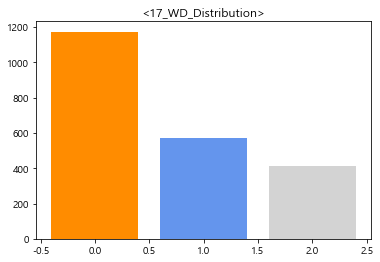

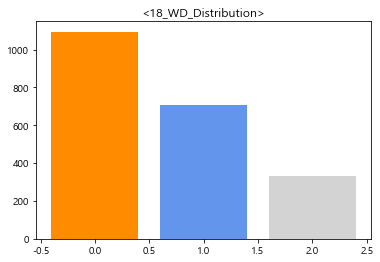

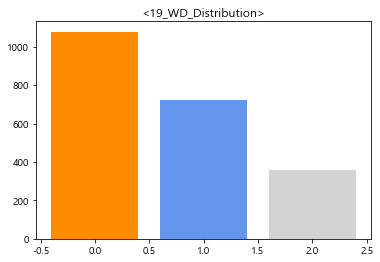

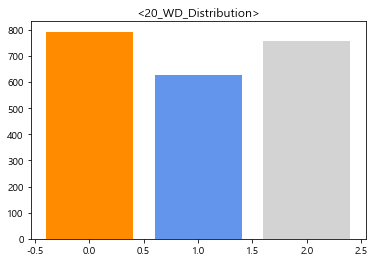

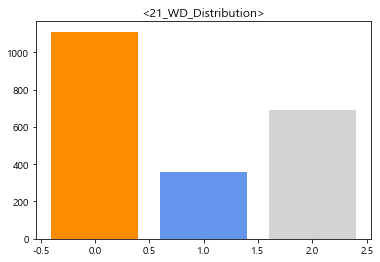

In [120]:
# 연도별 풍속 분포 살펴보기

for y in range(17, 21+1):
    wd = df_17_21_wd[f'sort_{y}WD'].value_counts()

    colors = {0:'darkorange', 1:'cornflowerblue', 2:'lightgray'}
    c = wd.index.map(lambda x: colors[x])

    plt.bar(wd.index, wd, color = c)
    plt.title(f'<{y}_WD_Distribution>')
    plt.show()

In [121]:
# 저장
df_17_21_wd.to_csv('./data/2017_21_12_2_wd.csv', encoding='utf-8-sig')

> > ## 풍속 데이터 5개년 합치기

In [105]:
df_21_w = pd.read_csv('./data/2021/2021_12_2_wind.csv')
df_20_w = pd.read_csv('./data/2020/2020_12_2_wind.csv', encoding='CP949')
df_19_w = pd.read_csv('./data/2019/2019_12_2_wind.csv', encoding='CP949')
df_18_w = pd.read_csv('./data/2018/2018_12_2_wind.csv', encoding='CP949')
df_17_w = pd.read_csv('./data/2017/2017_12_2_wind.csv', encoding='CP949')

In [106]:
df_21_w = df_21_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'21_W'})
df_20_w = df_20_w.drop(['지점', '지점명'], axis =1).rename(columns={'풍속(m/s)':'20_W'})
df_19_w = df_19_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'19_W'})
df_18_w = df_18_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'18_W'})
df_17_w = df_17_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'17_W'})

In [109]:
df_17_21_w = pd.concat([df_21_w, df_20_w, df_19_w, df_18_w, df_17_w], axis =1).set_index('일시')

df_17_21_w.to_csv('./data/2017_21_12_2_w.csv', encoding='utf-8-sig')

> > ## 풍속, 풍향 일시를 기준으로 합치기

In [122]:
df_17_21_wwd = pd.merge(df_17_21_w, df_17_21_wd,how='outer',left_index = True, right_index =True)
df_17_21_wwd

,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD
일시,,,,,,,,,,
2019-12-01 01:00,2.4,0.7,0.4,0.8,2.4,0,0,1,1,0
2019-12-01 02:00,1.6,0.0,1.0,1.0,3.0,0,1,2,1,0
2019-12-01 03:00,1.5,1.3,0.8,0.9,2.3,0,1,1,1,0
2019-12-01 04:00,1.3,1.0,1.2,2.3,2.9,0,2,1,1,0
2019-12-01 05:00,1.2,1.1,0.7,1.5,2.9,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-02-29 20:00,NaN,2.3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2020-02-29 21:00,NaN,1.3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2020-02-29 22:00,NaN,1.1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


> > ## 기온 데이터 5개년 합치기

In [123]:
df_21_t = pd.read_csv('./data/2021/2021_12_2_temp.csv')
df_20_t = pd.read_csv('./data/2020/2020_12_2_temp.csv', encoding='CP949')
df_19_t = pd.read_csv('./data/2019/2019_12_2_temp.csv', encoding='CP949')
df_18_t = pd.read_csv('./data/2018/2018_12_2_temp.csv', encoding='CP949')
df_17_t = pd.read_csv('./data/2017/2017_12_2_temp.csv', encoding='CP949')

In [124]:
df_21_t.head()

,지점,지점명,일시,기온(°C)
0,108,서울,2020-12-01 1:00,-1.4
1,108,서울,2020-12-01 2:00,-2.1
2,108,서울,2020-12-01 3:00,-2.2
3,108,서울,2020-12-01 4:00,-2.7
4,108,서울,2020-12-01 5:00,-3.2


In [125]:
df_21_t = df_21_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'21_T'})
df_20_t = df_20_t.drop(['지점', '지점명'], axis =1).rename(columns={'기온(°C)':'20_T'})
df_19_t = df_19_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'19_T'})
df_18_t = df_18_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'18_T'})
df_17_t = df_17_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'17_T'})

In [126]:
df_17_21_t = pd.concat([df_21_t, df_20_t, df_19_t, df_18_t, df_17_t], axis =1).set_index('일시')

In [127]:
df_17_21_t.to_csv('./data/2017_21_12_2_t.csv', encoding = 'utf-8-sig')

> > ## 기온과 풍속, 풍향을 일시를 기준으로 합치기

In [128]:
df_17_21_twwd = pd.merge(df_17_21_t, df_17_21_wwd, how='outer', left_index = True, right_index = True)
df_17_21_twwd.to_csv('./data/2017_21_12_2_twwd.csv', encoding = 'utf-8-sig')
df_17_21_twwd.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD
일시,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0,0,1,1,0
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0,1,2,1,0
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0,1,1,1,0
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0,2,1,1,0
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0,1,1,0,0


> > ## 미세먼지 농도와 twwd(기온, 풍속, 풍향)을 인덱스 기준으로 합치기

In [129]:
df_17_21_twwd.reset_index()
df_twwd_fd = pd.merge(df_17_21_twwd.reset_index(), df_17_21_fd,how='outer',left_index=True,right_index=True).set_index('일시')
df_twwd_fd.to_csv('./data/2017_21_12_2_twwd_fd.csv', encoding = 'utf-8-sig')

In [130]:
df_twwd_fd.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0,0,1,1,0,22.720,22.083333,18.28,11.00,22.608696
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0,1,2,1,0,21.520,20.250000,17.72,10.68,30.291667
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0,1,1,1,0,20.280,19.875000,18.88,10.76,39.791667
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0,2,1,1,0,19.120,19.541667,19.64,10.16,52.666667
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0,1,1,0,0,19.375,20.333333,19.16,9.60,58.625000


> > ## 20년 풍속 결측값 기준, 총 데이터 결측값 제거하기

   > > - 20년이 윤년이므로, 2월 29일을 제외한 공동 결측치 확인 및 제거

In [133]:
# 풍속 풍향 29일 이후 Nan 말고, 중간에 관측 결측값을 찾고, 제거한다.

df_twwd_fd[df_twwd_fd['20_W'].isna() == True]

# 전체 2200여개의 데이터 중 5개이므로 모델 성능을 훼손하지 않는 수준이라고 판단했다.

# 미세먼지 농도, 기온, 일시에 따른 시간대 개수 2184개인데 반해, 풍속 풍향은 아래와 같은 5개 시간의 결측값으로 인해 2179개였다.
# 그러나 놀라운 것은, 단순 관측 오류라고 보기에는 연도에 상관없이 이 5 시간대는 같은 결측값이라는 사실!
# 즉, 의도적인 결측으로 보이며, 정기 점검과 같은 의도적인 빈 값으로 보인다.
# 결국, 이 5개 시간대를 결측값으로서, 제거해주기로 한다. 

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-12 21:00,1.4,-1.2,-2.1,-8.8,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.400000,13.791667,19.48,17.458333,37.625000
2019-12-12 22:00,1.0,-1.2,-2.2,-9.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.040000,13.916667,18.52,16.750000,38.000000
2019-12-15 15:00,-5.2,11.0,3.2,0.1,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.136364,19.080000,36.72,65.217391,12.863636
2019-12-15 16:00,-5.0,10.5,2.6,0.0,-2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.565217,18.640000,37.25,64.166667,14.090909
2019-12-15 17:00,-6.0,9.6,1.8,-0.2,-3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318182,19.291667,39.24,62.608696,15.708333


In [134]:
# Don't one-hot encoding for WD
twwd_fd = df_twwd_fd[df_twwd_fd['20_W'].isna() == False] #결측 5개 제거

In [135]:
twwd_fd.to_csv('./data/2017_21_12_2_twwd_fd_drna.csv', encoding = 'utf-8-sig')

> # EDA 및 데이터 기초 통계량 분석

In [51]:
twwd_fd.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0.0,0,1.0,1.0,0.0,22.720,22.083333,18.28,11.00,22.608696
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0.0,1,2.0,1.0,0.0,21.520,20.250000,17.72,10.68,30.291667
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0.0,1,1.0,1.0,0.0,20.280,19.875000,18.88,10.76,39.791667
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0.0,2,1.0,1.0,0.0,19.120,19.541667,19.64,10.16,52.666667
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0.0,1,1.0,0.0,0.0,19.375,20.333333,19.16,9.60,58.625000


In [26]:
twwd_fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2179 entries, 2019-12-01 01:00 to 2020-03-01 00:00
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   21_T       2155 non-null   float64
 1   20_T       2179 non-null   float64
 2   19_T       2155 non-null   float64
 3   18_T       2155 non-null   float64
 4   17_T       2155 non-null   float64
 5   21_W       2158 non-null   float64
 6   20_W       2179 non-null   float64
 7   19_W       2158 non-null   float64
 8   18_W       2136 non-null   float64
 9   17_W       2160 non-null   float64
 10  sort_21WD  2158 non-null   float64
 11  sort_20WD  2179 non-null   int64  
 12  sort_19WD  2158 non-null   float64
 13  sort_18WD  2136 non-null   float64
 14  sort_17WD  2160 non-null   float64
 15  21_PM2.5   2155 non-null   float64
 16  20_PM2.5   2179 non-null   float64
 17  19_PM2.5   2155 non-null   float64
 18  18_PM2.5   2155 non-null   float64
 19  17_PM2.5   2155 non-null  

In [27]:
twwd_fd.describe()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
count,2155.000000,2179.000000,2155.000000,2155.000000,2155.000000,2158.000000,2179.000000,2158.000000,2136.000000,2160.000000,2158.000000,2179.000000,2158.000000,2136.000000,2160.000000,2155.000000,2179.000000,2155.000000,2155.000000,2155.000000
mean,-0.066682,1.842542,-0.201485,-2.534710,-0.259536,2.438369,2.204956,1.821918,1.943867,2.321065,0.805839,0.983938,0.665894,0.643727,0.647685,25.610394,28.323636,32.188548,31.431597,30.187164
std,6.575629,4.673184,5.174572,5.472447,4.965247,1.189886,1.186376,1.048697,1.144362,1.233073,0.892883,0.843720,0.744041,0.735795,0.781588,17.643291,16.674970,22.294448,21.768955,17.374309
min,-18.500000,-11.700000,-14.200000,-17.800000,-12.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.720000,1.739130,4.500000,4.476190,3.086957
25%,-4.900000,-1.400000,-3.700000,-6.200000,-3.800000,1.600000,1.300000,1.000000,1.000000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,12.760000,16.122500,17.816667,16.632500,17.291667
50%,0.200000,1.800000,-0.200000,-2.200000,-0.500000,2.300000,2.000000,1.600000,1.700000,2.100000,0.000000,1.000000,1.000000,0.000000,0.000000,19.960000,25.280000,25.160000,24.391304,26.875000
75%,5.000000,5.200000,2.800000,1.500000,3.300000,3.100000,2.900000,2.500000,2.700000,3.100000,2.000000,2.000000,1.000000,1.000000,1.000000,31.940000,37.960000,39.660000,38.694167,38.122500
max,17.200000,15.500000,14.100000,10.300000,13.100000,7.400000,7.400000,6.500000,6.700000,7.200000,2.000000,2.000000,2.000000,2.000000,2.000000,100.416667,118.400000,154.200000,149.920000,115.520000


> **변수별 상관성 시각화**
===
> > 데이터 합치기 : 미세먼지 농도(df_fd) + 온도/풍속(df_tw)
> > 결측값 제거 : 2개 wind에서 발생

In [137]:
twwd_fd.columns

Index(['21_T', '20_T', '19_T', '18_T', '17_T', '21_W', '20_W', '19_W', '18_W',
       '17_W', 'sort_21WD', 'sort_20WD', 'sort_19WD', 'sort_18WD', 'sort_17WD',
       '21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5'],
      dtype='object')

## 다중 공선성 확인

<AxesSubplot:>

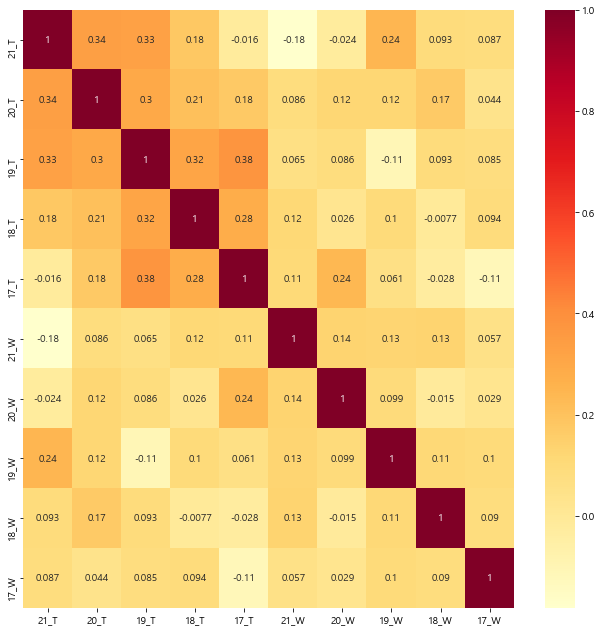

In [150]:
# 독립 변수 간의 다중공선성 문제 확인 -> 큰 문제 없다.

fig = plt.figure(figsize=(11,11))
sns.heatmap(twwd_fd.drop(['21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5'], axis=1).corr(), annot =True, cmap='YlOrRd')

## 주요 독립 변수 확인

<AxesSubplot:>

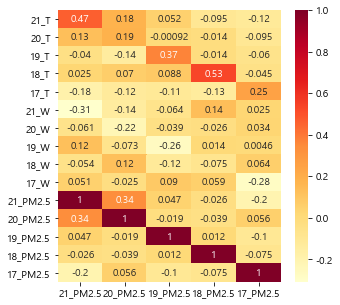

In [152]:
# 미세먼지 농도의 주요 설명 변수 확인 -> 기온, 풍속

fig = plt.figure(figsize=(5,5))
sns.heatmap(twwd_fd.corr()[['21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5']], annot =True, cmap='YlOrRd')

### 기온과 미세먼지 농도

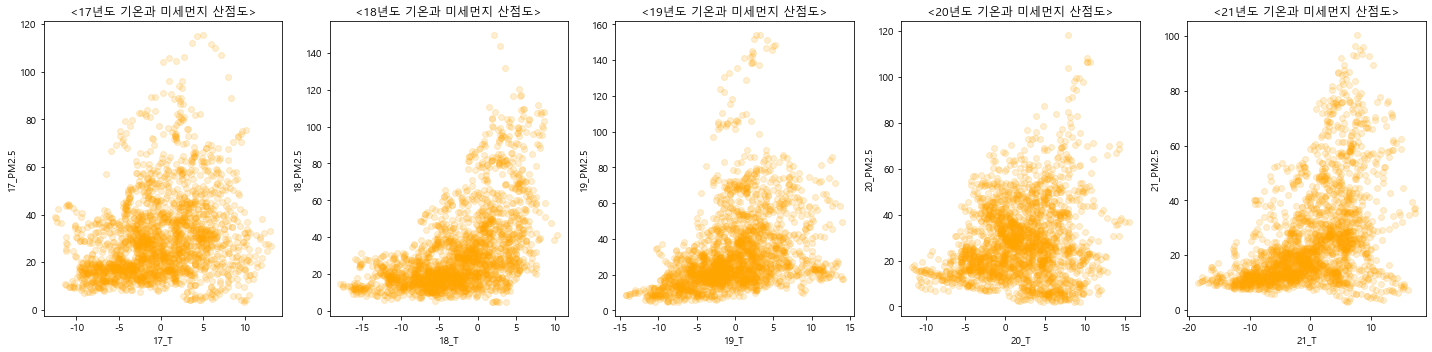

In [418]:
plt.figure(figsize=(20,5))

for i in range(1,5+1):

    plt.subplot(1, 5, i)
    plt.scatter(twwd_fd[f'{i+16}_T'], twwd_fd[f'{i+16}_PM2.5'], alpha = 0.18, c ='orange')
    plt.xlabel(f'{i+16}_T')
    plt.ylabel(f'{i+16}_PM2.5')
    plt.title(f'<{i+16}년도 기온과 미세먼지 산점도>')
plt.tight_layout()
plt.show()

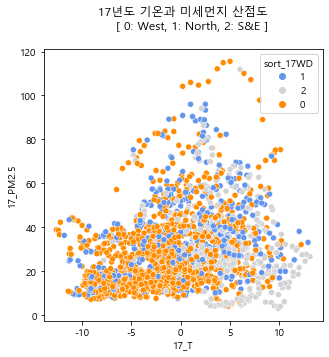

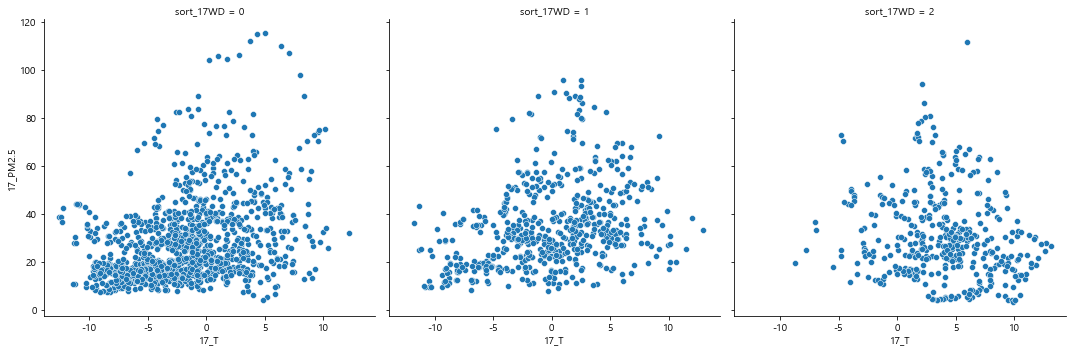

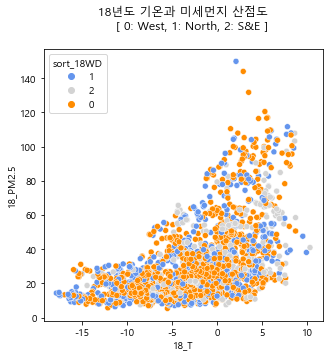

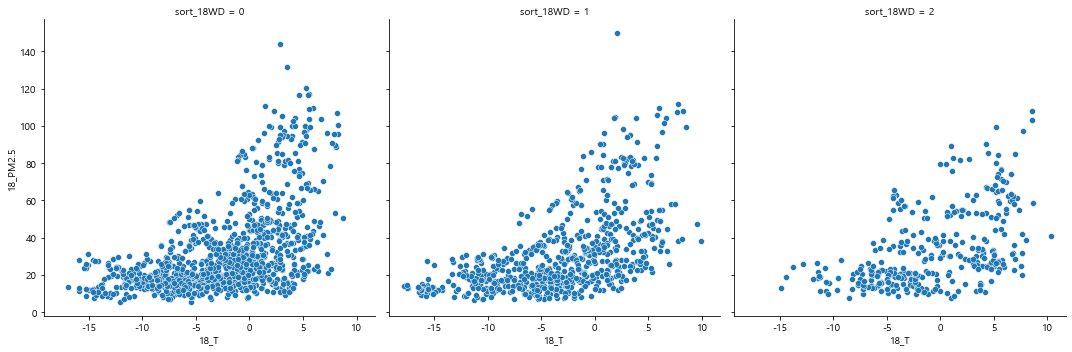

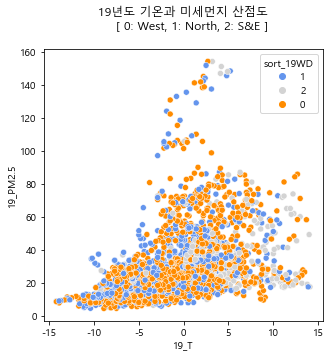

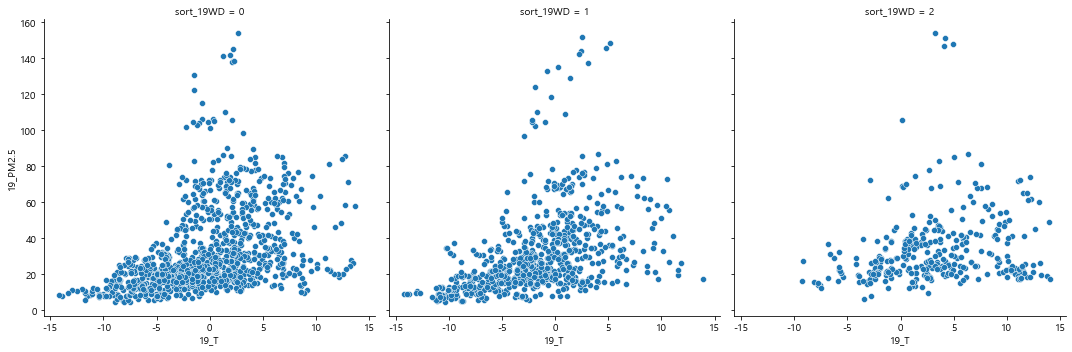

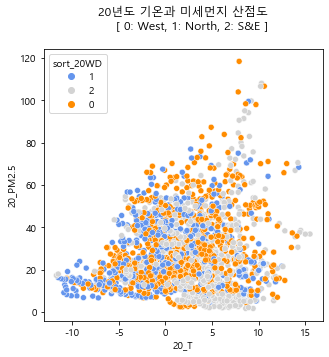

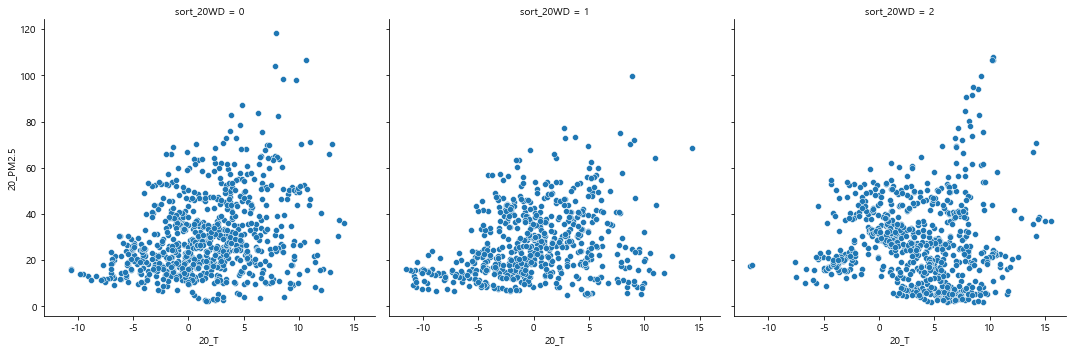

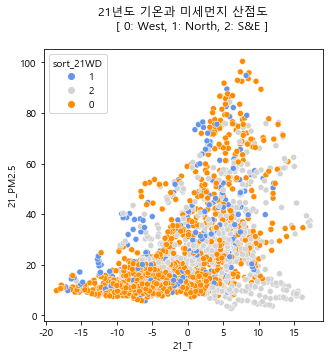

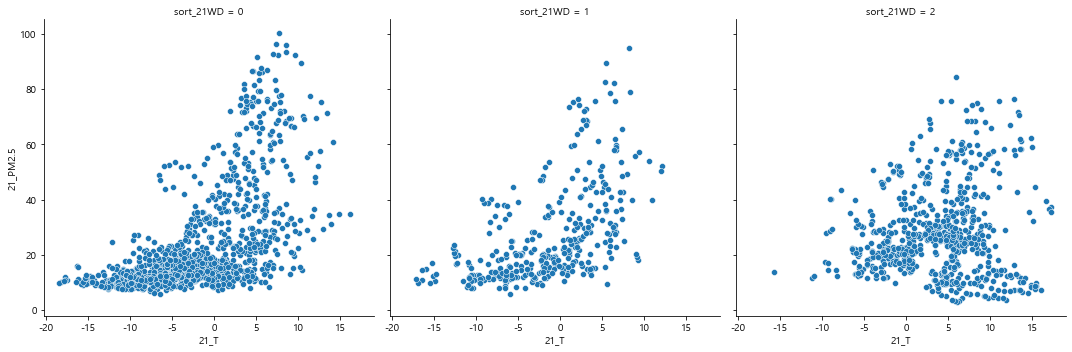

In [419]:
for i in range(1,5+1):
    plt.figure(figsize=(5,5))

    sns.scatterplot(x = f'{i+16}_T', y = f'{i+16}_PM2.5', data = twwd_fd, hue = f'sort_{i+16}WD', palette = {0:'darkorange', 1:'cornflowerblue', 2:'lightgray'})
    plt.title(f'''{i+16}년도 기온과 미세먼지 산점도
    [ 0: West, 1: North, 2: S&E ]
    ''')

    grid = sns.FacetGrid(data = twwd_fd, col = f'sort_{i+16}WD', col_order=[0,1,2], height = 5, aspect = 1, palette = { 0 : 'tab:orange', 1 :'cornflowerblue', 2 : 'lightgray'})
    grid.map(sns.scatterplot,f'{i+16}_T', f'{i+16}_PM2.5')

plt.show()

### 풍속과 미세먼지 농도

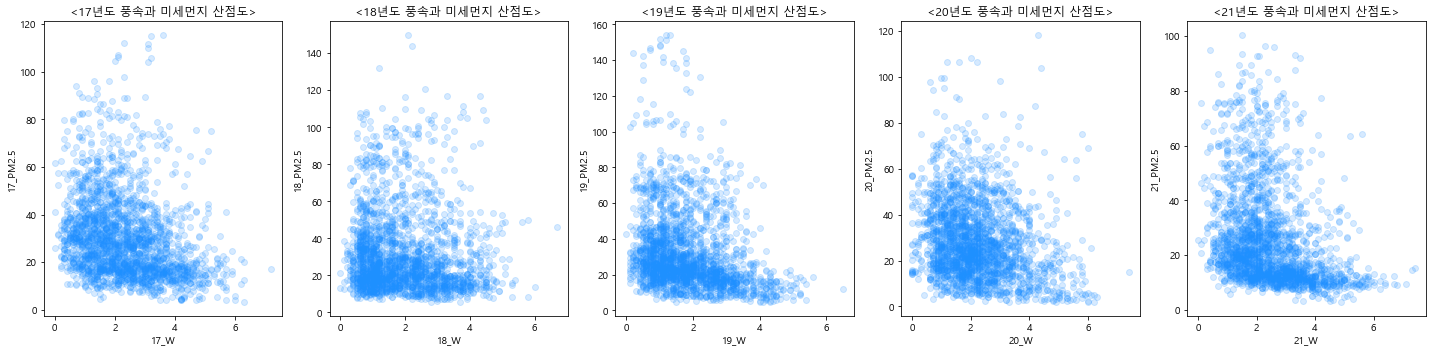

In [429]:
plt.figure(figsize=(20,5))

for i in range(1,5+1):

    plt.subplot(1, 5, i)
    plt.scatter(twwd_fd[f'{i+16}_W'], twwd_fd[f'{i+16}_PM2.5'], alpha = 0.18, c ='dodgerblue')
    plt.xlabel(f'{i+16}_W')
    plt.ylabel(f'{i+16}_PM2.5')
    plt.title(f'<{i+16}년도 풍속과 미세먼지 산점도>')
plt.tight_layout()
plt.show()

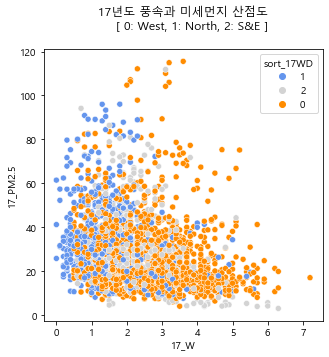

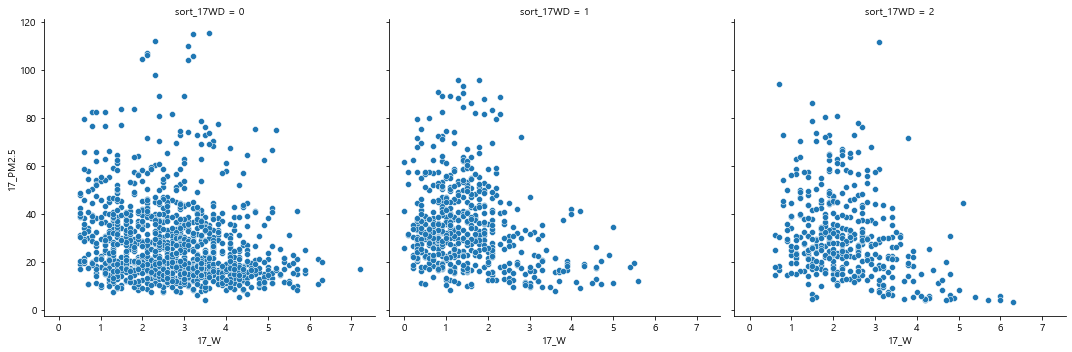

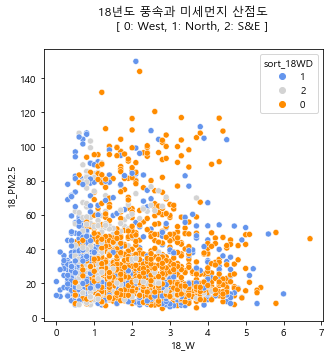

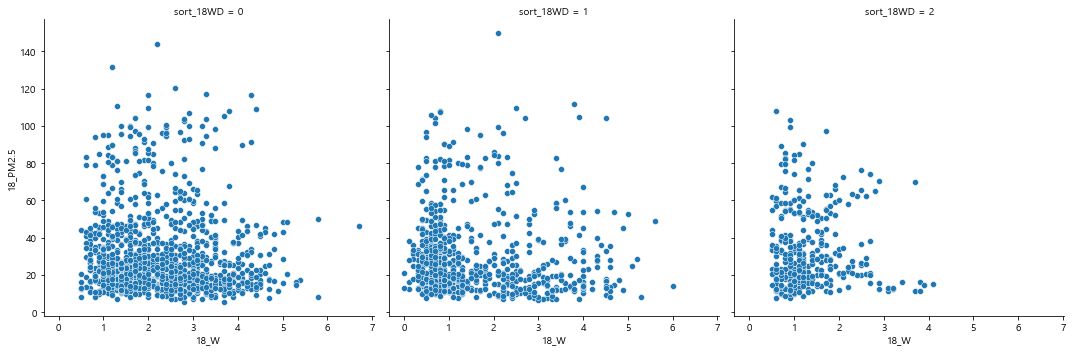

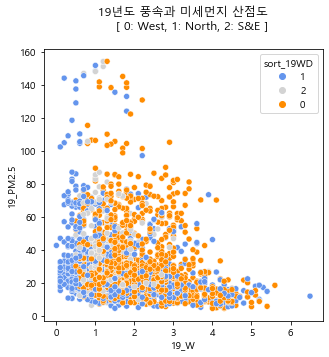

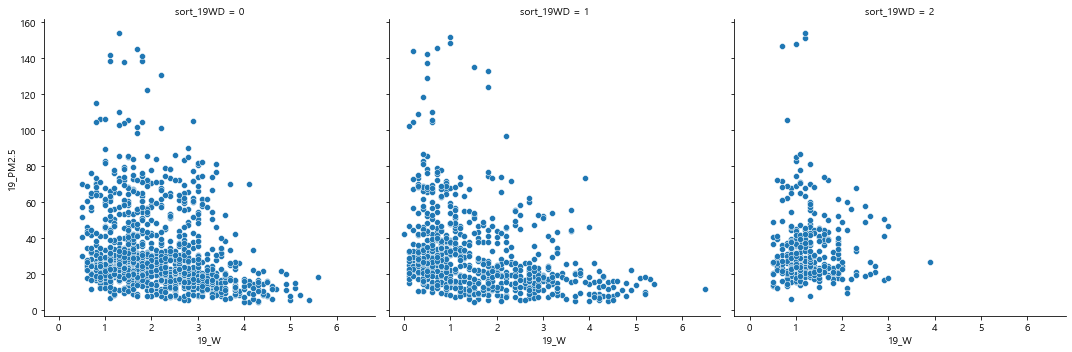

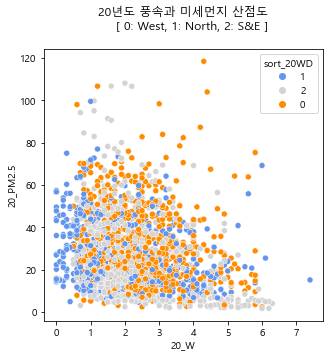

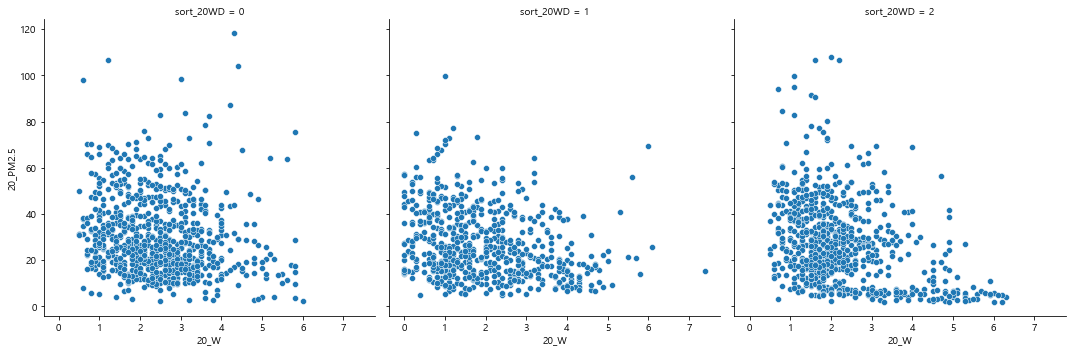

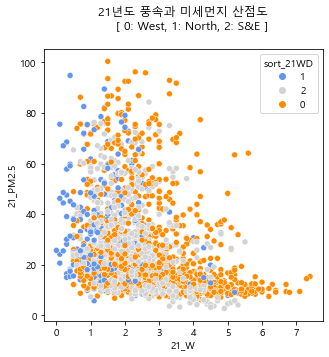

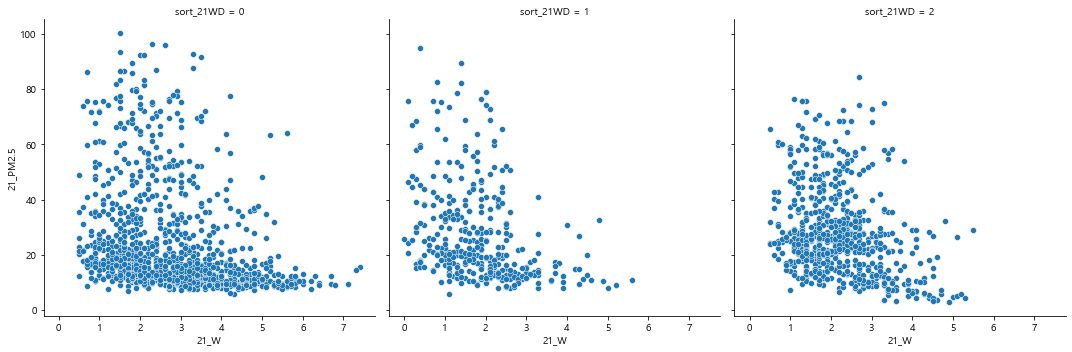

In [430]:
for i in range(1,5+1):
    plt.figure(figsize=(5,5))

    sns.scatterplot(x = f'{i+16}_W', y = f'{i+16}_PM2.5', data = twwd_fd, hue = f'sort_{i+16}WD', palette = {0:'darkorange', 1:'cornflowerblue', 2:'lightgray'})
    plt.title(f'''{i+16}년도 풍속과 미세먼지 산점도
    [ 0: West, 1: North, 2: S&E ]
    ''')

    grid = sns.FacetGrid(data = twwd_fd, col = f'sort_{i+16}WD', col_order=[0,1,2], height = 5, aspect = 1, palette = { 0 : 'tab:orange', 1 :'cornflowerblue', 2 : 'lightgray'})
    grid.map(sns.scatterplot,f'{i+16}_W', f'{i+16}_PM2.5')

plt.show()

### 상관성 평가

In [ ]:
# 기온은 미세먼지 농도와 양의 상관성 : 추우면 깨끗한 경향, 온화하면 먼지 심화 경향
# 풍속은 미세먼지 농도와 음의 상관성 : 약풍이면 먼지 심화 경향, 강풍이면 먼지 확산 및 약화 경향

# Regression 모델 학습하기
> ## Multiple Linear Regression 모델링 분석
> > **기온과 풍속, 풍향의 요인에 대한 PM2.5 분석**

> > ### 결측이 가장많은 18년 자료를 기준으로, 모든 결측치 제거

In [226]:
twwd_fd_rg = twwd_fd[twwd_fd['18_W'].isna() == False]

In [227]:
twwd_fd_rg.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0,0,1,1,0,22.720,22.083333,18.28,11.00,22.608696
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0,1,2,1,0,21.520,20.250000,17.72,10.68,30.291667
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0,1,1,1,0,20.280,19.875000,18.88,10.76,39.791667
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0,2,1,1,0,19.120,19.541667,19.64,10.16,52.666667
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0,1,1,0,0,19.375,20.333333,19.16,9.60,58.625000


> > ### 미세먼지 농도 5개년 평균값 구하기 - 종속 변수 하나의 항으로 합치기

In [228]:
# 각각 5개년 데이터 평균으로 합치기

twwd_fd_rg['PM2.5_m'] = (twwd_fd_rg['21_PM2.5']+twwd_fd_rg['20_PM2.5']+twwd_fd_rg['19_PM2.5']+twwd_fd_rg['18_PM2.5']+twwd_fd_rg['17_PM2.5']) / 5

twwd_fd_rg.drop(['21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5'], axis =1, inplace=True)

<ipython-input-228-3b49102a6006>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twwd_fd_rg['PM2.5_m'] = (twwd_fd_rg['21_PM2.5']+twwd_fd_rg['20_PM2.5']+twwd_fd_rg['19_PM2.5']+twwd_fd_rg['18_PM2.5']+twwd_fd_rg['17_PM2.5']) / 5
C:\BIGDATA\envs\datascience\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


> > ### 범주형 데이터 풍향을 get_dummies를 이용해 one-hot 벡터로 변경하기

In [229]:
X_cat = pd.get_dummies(data = twwd_fd_rg.iloc[:,10:14+1], columns = ['sort_21WD', 'sort_20WD', 'sort_19WD', 'sort_18WD', 'sort_17WD'])

> > ### StandardScaler를 이용해 수치형 데이터 표준화하기

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
# 5개년 각각 T, W 표준화

X_num = twwd_fd_rg.drop(['sort_21WD', 'sort_20WD', 'sort_19WD', 'sort_18WD', 'sort_17WD', 'PM2.5_m'], axis =1)

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [232]:
X = pd.concat([X_num, X_cat], axis =1)

y = twwd_fd_rg['PM2.5_m'] # 5개년 평균 낸 미세먼지 농도

> > ### 학습 데이터와 테스트 데이터 분리하기

In [233]:
# 풍속, 풍향, 기온 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

> > ### 모델 학습하기(다변량 : 풍속, 풍향, 기온)

In [234]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [235]:
pred = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

> > ### 모델 평가하기(다변량 : 풍속, 풍향, 기온)

In [236]:
# 회귀 모델 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print("MAE :", round(mean_absolute_error(y_test, pred), 2))
print("RMSE :", round(sqrt(mean_squared_error(y_test, pred)), 2))
print("R squared :", round(r2_score(y_test, pred), 2))

MAE : 5.72
RMSE : 7.28
R squared : 0.27


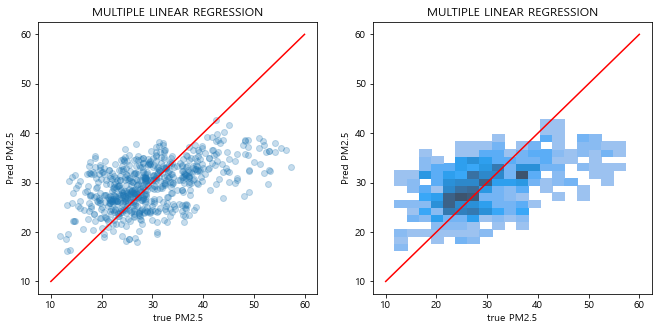

In [237]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용

plt.figure(figsize=(11,5))

plt.subplot(121)
plt.scatter(x=y_test, y=pred, alpha=0.25)
plt.plot([10,60], [10,60], 'r-')
plt.xlabel("true PM2.5")
plt.ylabel("Pred PM2.5")
plt.title("MULTIPLE LINEAR REGRESSION")

plt.subplot(122)
sns.histplot(x=y_test, y=pred)
plt.plot([10,60], [10,60], 'r-')
plt.xlabel("true PM2.5")
plt.ylabel("Pred PM2.5")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

> > ### 기온 단일 변수로 학습하기

In [238]:
# 기온 단일 변수는 얼마나 예측해낼까? 

X_T = X_num.drop(['21_W', '20_W', '19_W', '18_W','17_W'], axis =1)

In [239]:
# 기온 단일 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_T, y, test_size=0.3, random_state=1)

In [240]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

pred_T = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

In [243]:
# 회귀 모델 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print("MAE_T :", round(mean_absolute_error(y_test, pred_T), 2))
print("RMSE_T :", round(sqrt(mean_squared_error(y_test, pred_T)), 2))
print("R squared_T :", round(r2_score(y_test, pred_T), 2))

MAE_T : 5.95
RMSE_T : 7.55
R squared_T : 0.21


> > ### 풍속 단일 변수로 학습하기

In [269]:
# 기온 단일 변수는 얼마나 예측해낼까? 

X_W = X_num.drop(['21_T', '20_T', '19_T', '18_T','17_T'], axis =1)

In [273]:
# 기온 단일 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_W, y, test_size=0.3, random_state=1)

In [274]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

pred_W = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

In [275]:
# 회귀 모델 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print("MAE_T :", round(mean_absolute_error(y_test, pred_W), 2))
print("RMSE_T :", round(sqrt(mean_squared_error(y_test, pred_W)), 2))
print("R squared_T :", round(r2_score(y_test, pred_W), 2))

MAE_T : 6.61
RMSE_T : 8.33
R squared_T : 0.04


> > ### 풍향 단일 변수로 학습하기

In [276]:
X_cat.head()

,sort_21WD_1,sort_21WD_2,sort_21WD_0,sort_20WD_1,sort_20WD_2,sort_20WD_0,sort_19WD_1,sort_19WD_2,sort_19WD_0,sort_18WD_1,sort_18WD_2,sort_18WD_0,sort_17WD_1,sort_17WD_2,sort_17WD_0
일시,,,,,,,,,,,,,,,
2019-12-01 01:00,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
2019-12-01 02:00,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1
2019-12-01 03:00,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
2019-12-01 04:00,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
2019-12-01 05:00,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1


In [277]:
# 기온 단일 변수는 얼마나 예측해낼까? 

X_WD = X_cat

In [278]:
# 기온 단일 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_WD, y, test_size=0.3, random_state=1)

In [279]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

pred_WD = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

In [281]:
# 회귀 모델 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print("MAE_WD :", round(mean_absolute_error(y_test, pred_WD), 2))
print("RMSE_WD :", round(sqrt(mean_squared_error(y_test, pred_WD)), 2))
print("R squared_WD :", round(r2_score(y_test, pred_WD), 2))

MAE_WD : 6.53
RMSE_WD : 8.41
R squared_WD : 0.02


> > #### 기온 변수 중요성 평가

In [248]:
print("R squared_T/ R squared =", round(0.21/0.27 * 100, 2),"%")

R squared_T/ R squared = 77.78 %


> ## XGBoost Regression 모델 학습하기

In [251]:
# 풍속, 풍향, 기온 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [252]:
from xgboost import XGBRegressor

In [253]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

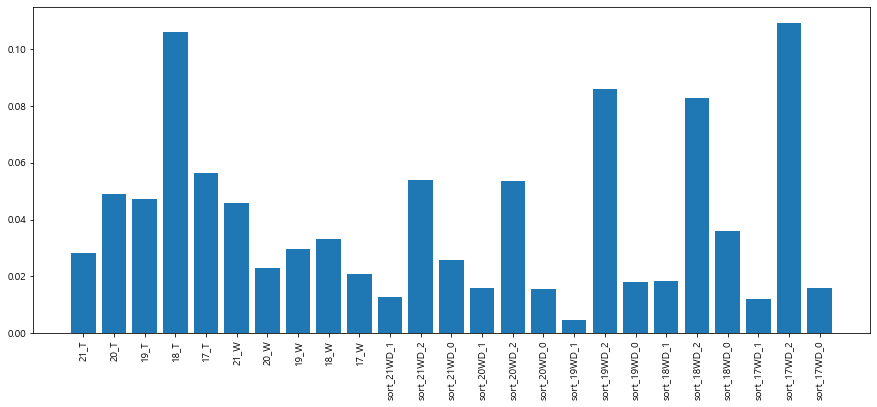

In [255]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 6))
plt.bar(X.columns, model_reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 전반적으로 온도가 미세먼지 농도에는 더 중요한 요인!
# 풍향에서 2번, 즉 남동풍이 미세먼지 농도에 특히 중요한 요인으로 작용하고 있다! Why?

> > ### 모델 학습 결과 평가하기

In [254]:
pred_xg = model_reg.predict(X_test)

In [258]:
# 회귀 모델 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print("MAE_xg :", round(mean_absolute_error(y_test, pred_xg), 2))
print("RMSE_xg :", round(sqrt(mean_squared_error(y_test, pred_xg)), 2))
print("R squared_xg :", round(r2_score(y_test, pred_xg), 2))

MAE_xg : 3.58
RMSE_xg : 4.77
R squared_xg : 0.68


> > ### 실제 값과 추측 값의 Scatter plot 시각화하기

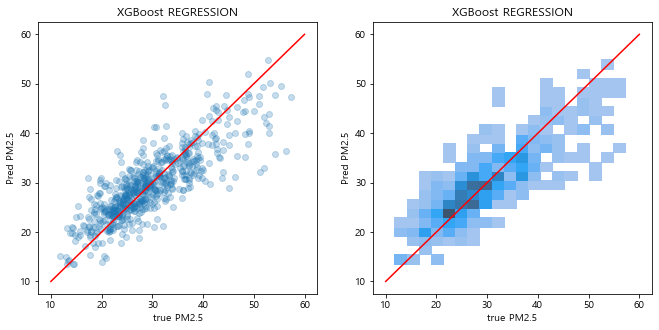

In [259]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용

plt.figure(figsize=(11,5))

plt.subplot(121)
plt.scatter(x=y_test, y=pred_xg, alpha=0.25)
plt.plot([10,60], [10,60], 'r-')
plt.xlabel("true PM2.5")
plt.ylabel("Pred PM2.5")
plt.title("XGBoost REGRESSION")

plt.subplot(122)
sns.histplot(x=y_test, y=pred_xg)
plt.plot([10,60], [10,60], 'r-')
plt.xlabel("true PM2.5")
plt.ylabel("Pred PM2.5")
plt.title("XGBoost REGRESSION")
plt.show()

> > ### 기온 단일 변수에 대한 PM2.5 예측

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_T, y, test_size=0.3, random_state=1)

In [261]:
from xgboost import XGBRegressor

# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [262]:
pred_xg_T = model_reg.predict(X_test)

In [265]:
# 회귀 모델 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print("MAE_xg_T :", round(mean_absolute_error(y_test, pred_xg_T), 2))
print("RMSE_xg_T :", round(sqrt(mean_squared_error(y_test, pred_xg_T)), 2))
print("R squared_xg_T :", round(r2_score(y_test, pred_xg_T), 2))

MAE_xg_T : 3.76
RMSE_xg_T : 5.25
R squared_xg_T : 0.62


> > #### 기온 변수 중요성 평가하기

In [268]:
print("R squared_xg_T/ R squared_xg =", round(0.62/0.68 * 100, 2),"%")

R squared_xg_T/ R squared_xg = 91.18 %


----

# <결과 및 해석>

### 변수 간 시각화 해석
   - 기온은 미세먼지 농도와 **양의 상관성** : 추우면 깨끗한 경향, 온화하면 먼지 심화 경향 
   - 풍속은 미세먼지 농도와 **음의 상관성** : 약풍이면 먼지 심화 경향, 강풍이면 먼지 확산 및 약화 경향
   - 풍향 분류에서는 뚜렷한 관계성이 나타나지 않음
   - 서풍에서 기온과 미세먼지의 상관성 산점도 : 확실히 **기온이 따뜻할 때(서풍) 고농도의 띠**가 생긴다는 것을 포착할 수 있다.

#### 기온, 풍속의 피어슨 상관계수(참고)

``{'17_T_pearsonr': 0.253,
 '18_T_pearsonr': 0.535,
 '19_T_pearsonr': 0.354,
 '20_T_pearsonr': 0.203,
 '21_T_pearsonr': 0.48}``

``{'17_W_pearsonr': -0.277,
 '18_W_pearsonr': -0.075,
 '19_W_pearsonr': -0.27,
 '20_W_pearsonr': -0.231,
 '21_W_pearsonr': -0.31}``

### 모델 학습 결과 해석
   
   - **모델에 따라 성능 차이**가 크게 나타났다. 고전 통계 기법을 모방한 선형 회귀 같은 경우보다 최신 딥러닝 기법이 활용된 XGBoost 성능이 크게 뛰어났다. **딥러닝을 활용한 겨울철 미세먼지 농도 예측의 의의**가 있다.
   
   1. Multiple Linear Regression : R squared 0.27 
   
   2. XGBoost Regression : R squared 0.68
   
   - 즉, 기온과 풍속, 풍향의 세 변수로 미세먼지 농도를 좋은 성능으로 예측할 수 있다는 결과가 나왔다. 다시 말해, **미세먼지 농도에서 기온과 풍속, 풍향이 중요한 변수로 작용**한다.
    
   - 특히 그중에서도, 풍속과 풍향 대비 **기온이 더욱 중요한 변수**라는 것을 확인했다. 예측 설명력의 지표인 결정 계수에서 기온이 차지하는 비율을 살펴보았다.
   
   1. Multiple Linear Regression : R squared_T/ R squared = 77.78 %
   
   2. XGBoost Regression: R squared_xg_T/ R squared_xg = 91.18 %
   
   - (참고) 풍향 중에서도 남동풍이 미세먼지 농도에 두드러진 중요성을 보여줬다. 실제로 남동풍은 강원도에서 팬 현상으로 인한 따뜻한 공기가 넘어온다고 알려져있다. 따라서 높은 확률로 서울시의 미세먼지를 깨끗하게 하는 바람이다. 즉, 농도와는 음의 방향으로 높은 상관성을 보여준 것이라고 해석할 수 있다.


### 모델 한계 및 보완
- 특히, 독립 변수의 특성 상 **국내 서울시의 관측 값**이라는 것이 한계이다. 보완하면, **중국의 미세먼지 농도와 서해상 기온과 바람 등** 복합적인 지역 별 고려가 필요할 것이다.

- **풍향의 뚜렷한 관계성**이 관찰되지 않았다. 다음과 같은 한계점을 고려해볼 수 있다.
   
   1. 서울시 관측소 기준 풍향이다. 즉, 서쪽으로 중국에서 넘어오든, 북쪽에서 시베리아에서 넘어오든, **그 경로 과정이 빠져있다는 한계점**이 있다.
   
   2. 서쪽의 중국 만큼이나 농도가 높지는 않지만, **북쪽에서도 오염원**이 넘어올 가능성이 있다.
   
   3. **북쪽의 찬 공기**가 내려오면, 지면의 열 에너지에 좌우되는 **서울의 Boundary Layer가 함께 낮아진다.** 따라서, 공간이 줄어들면 오염원의 밀도는 상대적으로 높아지게 되므로, 고농도의 결과로 나타날 수 있다.

----